In [1]:
# The following command cleans the working memory and ensures that all references are to items created in this file.
rm(list=(ls()))

In [3]:
# Data set containing sales of child car seats (coded as high or low) at 400 different stores
carseats <- read.csv("carseats.csv")

In [4]:
#Let's perform some pre-processing

#Convert the variables below into a factor.
#There are only three categorical variables that we want to convert into a factor, but when you have many variables to convert, you may want to automate the process.

carseats$ShelveLoc <- factor(carseats$ShelveLoc)
carseats$Urban <- factor(carseats$Urban)
carseats$US <- factor(carseats$US)
carseats$sales <- factor(carseats$sales)

In [5]:
#Let's split the data into a train (70%) and test (30%) sets.

set.seed (23) # for reproducibility
library(caret) 

# Caret has a nice createdataPatrition function that creates a train and test split. It performs stratified sampling based on the target variable (label).

index <- createDataPartition(y = carseats$sales,
                                     p = .7,
                                     list = FALSE)

carseats.train <- carseats[index,] 
carseats.test <- carseats[-index,]

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [6]:
# Fit a decision tree
install.packages("rpart", repos = "http://cran.us.r-project.org") 
install.packages("rpart.plot", repos = "http://cran.us.r-project.org") 
library(rpart)
library(rpart.plot)
set.seed(23)

# Set the formula with all variables.If you choose, you can manually type the formula.
target <- "sales"
features <- c("CompPrice",
              "Income",
              "Advertising",
              "Population",
              "Price",
              "ShelveLoc",
              "Age" ,
              "Education",
              "Urban",
              "US")



dtree.f <- as.formula(paste(target, paste(features, collapse = "+"), sep = "~"))

package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Dave\anaconda3\envs\charts\Lib\R\library\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\Dave\anaconda3\envs\charts\Lib\R\library\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\Dave\AppData\Local\Temp\RtmpIpcrCu\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dave\AppData\Local\Temp\RtmpIpcrCu\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

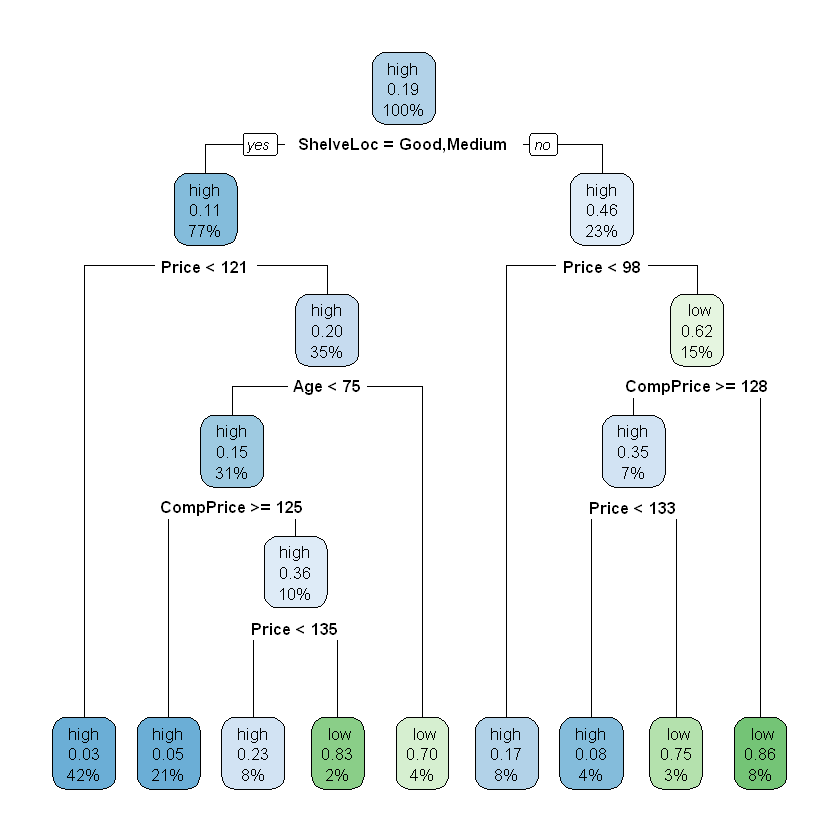

In [7]:
# Fit a decision tree and save to dtree, method = "class" ensures the target is treated as a categorical variable.
dtree <- rpart(dtree.f, data = carseats.train, method = "class",
             control = rpart.control(minbucket = 5, cp = 0.01, maxdepth = 5), 
             parms = list(split = "gini"))

# Plot the tree.
rpart.plot(dtree)

In [8]:
#Training Error

#Let's get prediction on the training set
# If you don't specify the newdata, the predict function takes the data the model was trainined on.
pred_train <- predict(dtree, type = "class") #predicts classes

#Let's get a confusion matrix, and calculate accuracy
#The caret package has a function to calculate a confusion matrix, but we will use table
table(pred_train, carseats.train$sales)

          
pred_train  high   low
     high     218   17
     low        9   37

In [9]:
# Accuracy
# It has 90.7% accuracy on the training test. Please note that accuracy could mean many different things, here we are referring to the percentage the decision tree made correct predictions

(218+37)/(218+37+9+17)

[1] 0.9074733

In [10]:
# How well does the model (decision tree) do on test data?

#Let's get prediction on the test set
pred_test <- predict(dtree, type = "class", newdata = carseats.test) #predicts classes

#Let's get a confusion matrix, and calculate accuracy

table(pred_test, carseats.test$sales) 

         
pred_test  high   low
    high      82   15
    low       14    8

In [11]:
# Accuracy
# It has 75.6% accuracy on the test set (much lower than the accuracy obtained in the training set.)

(82+8)/(82+8+14+15)

[1] 0.7563025